## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [169]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [170]:
train_df = pd.read_csv('C:\\Users\\pilar\\Edition_Jun2020\\Repositorios_GitHub\\DataSets\\sarcasm\\train-balanced-sarcasm.csv')

In [171]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


Some comments are missing, so we drop the corresponding rows.

In [172]:
train_df.dropna(inplace=True)

In [173]:
train_df['comments'] = train_df['comment'].str.replace('[^\w\s]','') 

train_df.drop(['comment'],inplace=True, axis=1)

In [174]:
train_df = train_df[['label',
 'comments',
 'author',
 'subreddit',
 'score',
 'ups',
 'downs',
 'date',
 'created_utc',
 'parent_comment']]

In [175]:
train_df.head()

,label,comments,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,They were underdogs earlier today but since Gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,This meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comments        1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


We notice that the dataset is indeed balanced

In [177]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [178]:
train_texts, valid_texts, y_train, y_valid = train_test_split(train_df['comments'], train_df['label'], random_state=17)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

In [179]:
import plotly.graph_objs as go
import plotly.offline as py

In [180]:
cnt_lbl = train_df['label'].value_counts()
trace = go.Bar(
    x = cnt_lbl.index,
    y=cnt_lbl.values,
    marker=dict(
        color=cnt_lbl.values,
        colorscale = 'Picnic',
        reversescale = True),
)
layout = go.Layout(
    title='Number of Labels',
    font = dict(size=11)
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "TargetCount")

In [181]:
labels = (np.array(cnt_lbl.index))
sizes = (np.array((cnt_lbl/cnt_lbl.sum())*100))

trace = go.Pie(labels = labels,
            values = sizes)

layout = go.Layout(title = "Label distribution" ,
                  font = dict(size = 11),
                   width = 600,
                   height = 600)
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "usertype")

In [182]:
#!pip install wordcloud

In [183]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud (text, mask=None, max_words= 200, max_font_size= 100,
                    figure_size= (20.0,12.0), title= None, title_size= 40,
                    image_color = False):

    stopwords = set(STOPWORDS)
    more_stopwords = {'br', 'Po', 'th', 'sayi', 'fo', 'Unkown'}
    stopwords = stopwords.union(more_stopwords)
    
    wordcloud = WordCloud(background_color='white',
                         stopwords = stopwords,
                         max_words = max_words,
                         max_font_size = max_font_size,
                         random_state = 42,
                         width = 800,
                         height=400,
                         mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func = image_colors),
                  interpolationv= 'bilinear');
        plt.title(title, fontdict={'size': title_size,
                                   'verticalalignment': 'bottom'})
        
    else:
        plt.imshow(wordcloud);
        plt.title(title,
                  fontdict={'size': title_size,
                            'color': 'black',
                            'verticalalignment': 'bottom'})
        plt.axis('off');
        plt.tight_layout()    

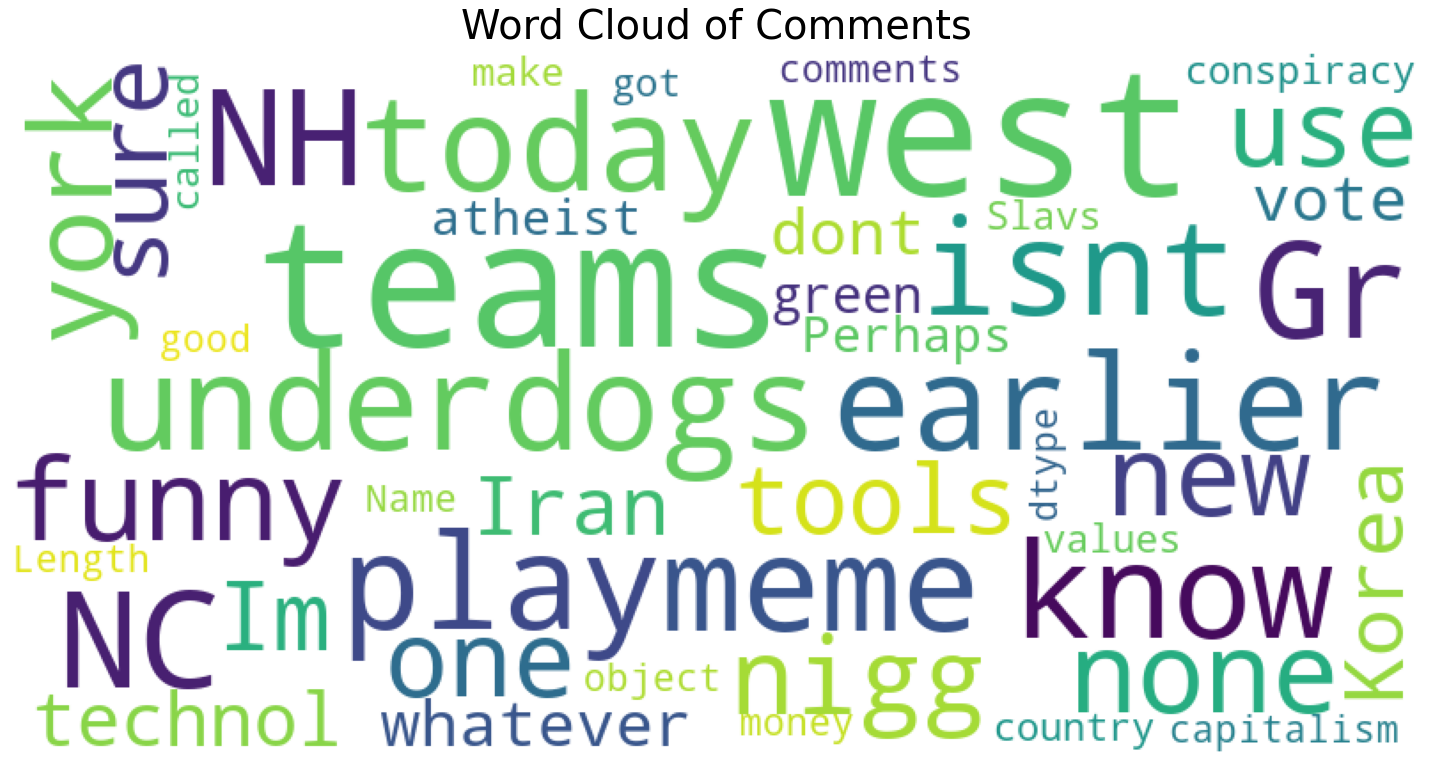

In [184]:
plot_wordcloud(train_df["comments"], title="Word Cloud of Comments")

In [185]:
from collections import defaultdict
from plotly import subplots

train1_df = train_df[train_df["label"]==1]
train0_df = train_df[train_df["label"]==0]

def generate_ngrams(text, n_gram=1):
    token = [token for token
             in text.lower().split(" ")
             if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
    y=df["word"].values[::-1],
    x=df["wordcount"].values[::-1],
    showlegend=False,
    orientation = 'h',
    marker = dict(
    color=color,
    ),
    )
    return trace

freq_dict = defaultdict(int)

for sent in train0_df["comments"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from sarcastic comment ##
freq_dict = defaultdict(int)

for sent in train1_df["comments"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic comments",
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [186]:
freq_dict = defaultdict(int)
for sent in train0_df["comments"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')
freq_dict = defaultdict(int)
for sent in train1_df["comments"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')
# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of not sarcastic questions",
                                          "Frequent bigrams of sarcastic questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

In [187]:
freq_dict = defaultdict(int)

for sent in train0_df["comments"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)

for sent in train1_df["comments"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of not sarcastic comments",
                                          "Frequent trigrams of sarcastic comments"])

fig.append_trace(trace0, 1, 1)

fig.append_trace(trace1, 1, 2)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")

py.iplot(fig, filename='word-plots')

In [188]:
def most_frecuent(output):
    return max(set(output), key = output.count)

In [189]:
from collections import Counter
from nltk import ngrams

s = train0_df['comments'].to_json()
ngram_counts = Counter(ngrams(s.split(), 2))
print(ngram_counts.most_common(10))

[(('in', 'the'), 15116), (('of', 'the'), 14883), (('to', 'be'), 8443), (('on', 'the'), 8003), (('is', 'a'), 7543), (('to', 'the'), 7215), (('for', 'the'), 6907), (('fuck', 'fuck'), 5225), (('if', 'you'), 5095), (('is', 'the'), 4871)]


In [190]:
import string

## Number of words in the text ##
train_df["num_words"] = train_df["comments"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["comments"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["comments"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["comments"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['comments'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_df["num_words_upper"] = train_df["comments"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["comments"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["comments"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


C:\Users\pilar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.



In [191]:
train_df

,label,comments,author,subreddit,score,ups,downs,date,created_utc,parent_comment,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,0,NC and NH,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",3,3,9,1,0,2,0,2.333333
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,14,11,73,5,0,0,1,4.285714
2,0,They were underdogs earlier today but since Gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,19,19,117,8,0,0,3,5.210526
3,0,This meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,12,12,56,4,0,0,1,3.750000
4,0,I could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,7,7,30,4,0,1,1,3.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010821,1,Im sure that Iran and N Korea have the technol...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,...",16,16,87,6,0,1,4,4.500000
1010822,1,whatever you do dont vote green,BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...,6,6,31,2,0,0,0,4.333333
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...,11,11,65,4,0,0,2,5.000000
1010824,1,The Slavs got their own country it is called ...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...,10,10,52,5,0,0,3,4.200000


C:\Users\pilar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pilar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Number of characters in each class')

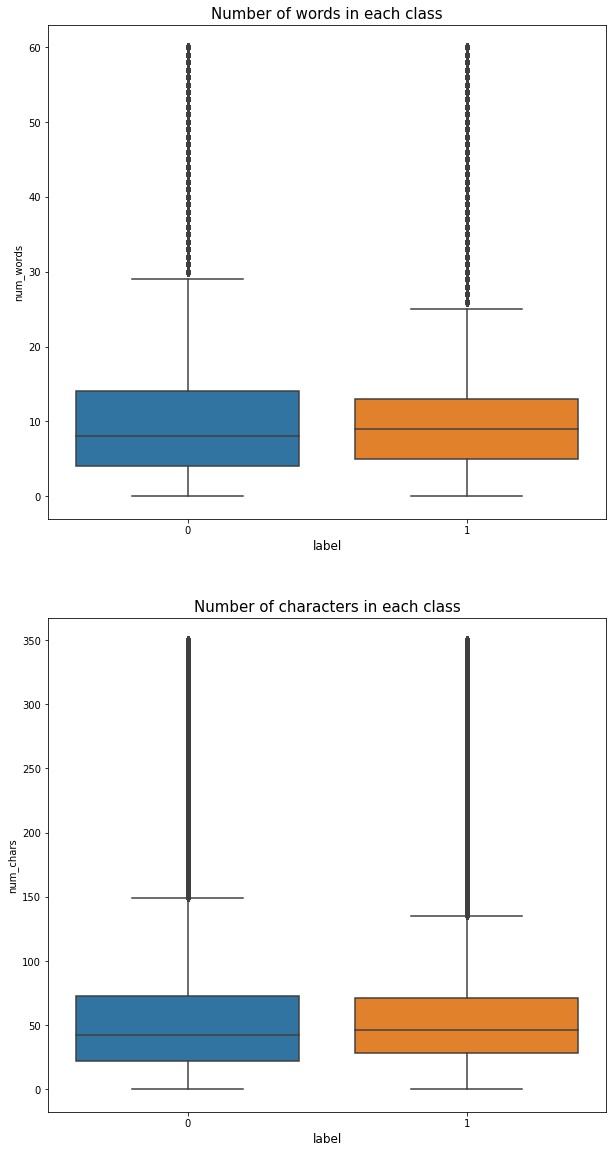

In [192]:
## Truncate some extreme values for better visuals ##
train_df['num_words'].loc[train_df['num_words']>60] = 60 #truncation for better visuals
train_df['num_chars'].loc[train_df['num_chars']>350] = 350 #truncation for better visuals
f, axes = plt.subplots(2, 1, figsize=(10,20))
sns.boxplot(x='label', y='num_words', data=train_df, ax=axes[0])
axes[0].set_xlabel('label', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)
sns.boxplot(x='label', y='num_chars', data=train_df, ax=axes[1])
axes[1].set_xlabel('label', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

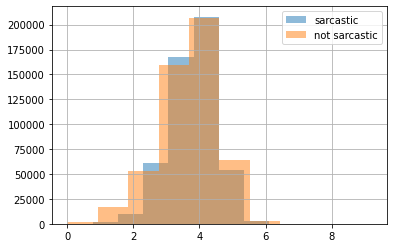

In [193]:
train_df.loc[train_df['label'] == 1, 'comments'].str.len().apply(np.log1p).hist(label= 'sarcastic', alpha= 0.5)
train_df.loc[train_df['label'] == 0, 'comments'].str.len().apply(np.log1p).hist(label= 'not sarcastic', alpha= 0.5)
plt.legend()

In [194]:
#analizamos si en media hay subreddits más sarcasticos que otros
#ordenados por total de comentarios

sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26376,0.642516,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


In [195]:
#ordenados de subreddits más sarcásticos a menos
sub_df[sub_df['size'] > 1000].sort_values(by= 'mean', ascending= False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26376,0.642516,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


In [196]:

tf_idf = TfidfVectorizer(ngram_range= (1,2), max_features= 50000, min_df= 2)

logit = LogisticRegression(C=1, n_jobs=4, solver= 'lbfgs',
                          random_state= 17, verbose= 1)

tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf),
                                 ('logit', logit)])

In [197]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   19.6s finished


Wall time: 1min 8s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [198]:
tfidf_logit_pipeline.named_steps

{'tf_idf': TfidfVectorizer(max_features=50000, min_df=2, ngram_range=(1, 2)),
 'logit': LogisticRegression(C=1, n_jobs=4, random_state=17, verbose=1)}

In [199]:
tfidf_logit_pipeline.named_steps['logit']

LogisticRegression(C=1, n_jobs=4, random_state=17, verbose=1)

In [200]:
tfidf_logit_pipeline.named_steps['logit'].classes_

array([0, 1], dtype=int64)

In [201]:
pred_proba_train = tfidf_logit_pipeline.predict_proba(train_texts)

In [202]:
pred_proba_train

array([[0.34937002, 0.65062998],
       [0.39160719, 0.60839281],
       [0.63594087, 0.36405913],
       ...,
       [0.28059696, 0.71940304],
       [0.43843831, 0.56156169],
       [0.36560713, 0.63439287]])

<AxesSubplot:>

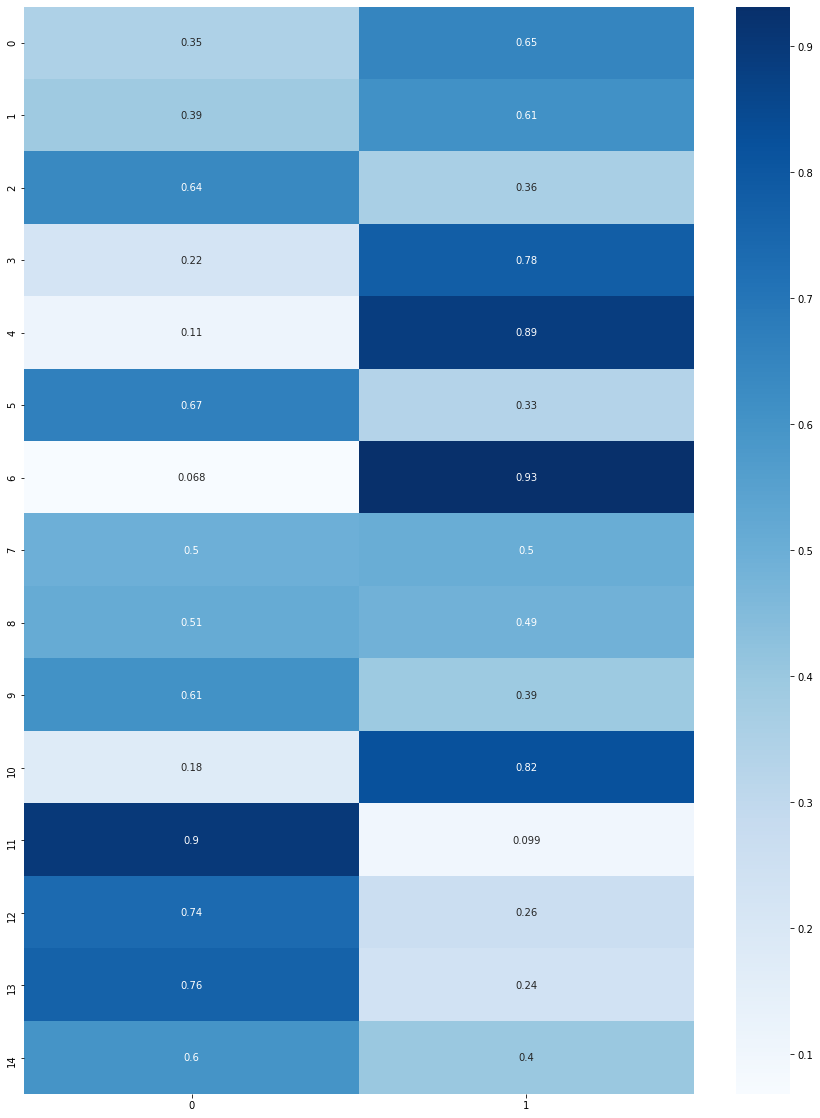

In [203]:
plt.subplots(figsize=(15,20))
sns.heatmap(pred_proba_train[:15], annot=True, cmap= 'Blues')

In [204]:
%%time
valid_y = tfidf_logit_pipeline.predict(valid_texts)

Wall time: 11.5 s


In [205]:
accuracy_score(y_valid, valid_y)

0.7217108439456418

In [206]:
%%time
valid_pred = tfidf_logit_pipeline.predict(valid_texts)

Wall time: 11 s


In [207]:
# Pintamos la matriz de confusión
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    import itertools
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

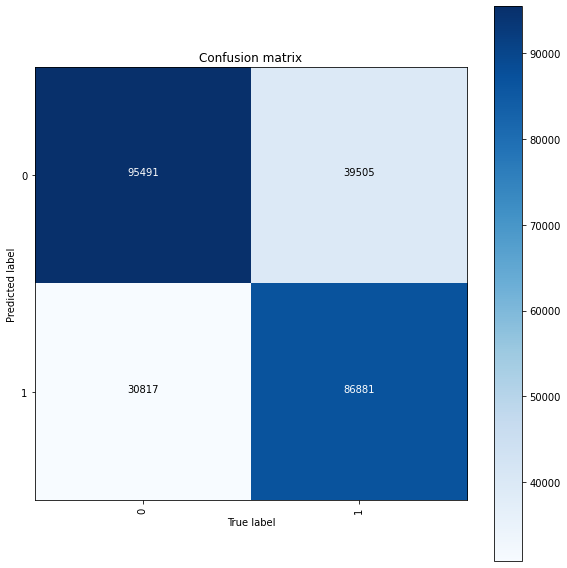

In [208]:
plot_confusion_matrix(y_valid, valid_y,
                     tfidf_logit_pipeline.named_steps['logit'].classes_,
                     figsize=(8,8))

In [209]:
#!pip install eli5

In [211]:
import eli5 #modulo para clasificadores ==> y sobre los clasificadores explicar la predición
eli5.show_weights(estimator= tfidf_logit_pipeline.named_steps['logit'],
                 vec= tfidf_logit_pipeline.named_steps['tf_idf'])

Weight?,Feature
+8.716,yes because
+7.696,obviously
+7.578,clearly
+7.155,totally
+7.012,yeah because
+6.998,im sure
+6.127,because
+5.813,how dare
+5.550,right because
+5.215,good thing
